# BANKING SET : BANK TELEMARKETING 

# On procède aux meme opérations que le 1er algorithme, sauf que pour tous les features de type objet ( ie qui sont des classes ) on les transforme en one hot 

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt

from sklearn import cross_validation
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


from keras.utils import to_categorical
from sklearn.cross_validation import train_test_split

/Users/cheikh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/cheikh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/cheikh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import regi

# Importing Data 

In [2]:
bank = pd.read_csv('bank-full.csv',delimiter=';',header=0)
bank.shape

(45211, 17)

In [3]:
# On tranforme les output par 1 pour yes et 0 pour non 
bank.y.replace(('yes','no'),(1,0), inplace=True)

In [4]:
# Ici on procède à l'encoding des features qui sont de type catégories en appliquant la fonction get.dummies. 
# On peut l'appliquer directement sur tous les features, car elle va considérer 
# que les features de type categories et ignoner ceux de type numerique
t = pd.get_dummies(bank.iloc[:,:-1])
t.shape

(45211, 51)

# Print The the type of the features after hot encoding them 

In [5]:
print("Data Types:", t.dtypes)

Data Types: age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_telephone      uint8
co

# Print & Plot the Correlation between the features 

Populating the interactive namespace from numpy and matplotlib


<Figure size 1080x720 with 0 Axes>

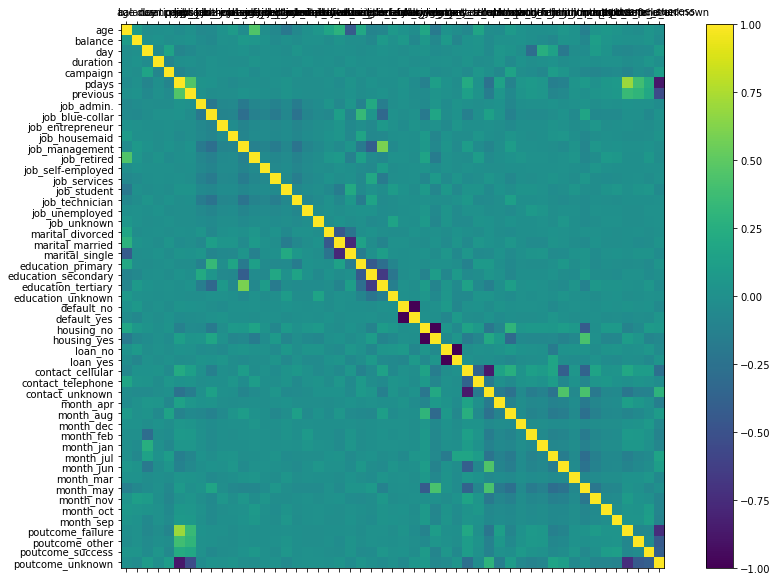

In [6]:
%pylab inline 
corr = t.corr(method='pearson')
plt.figure(1, figsize(15,10))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,51,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(t.columns)
ax.set_yticklabels(t.columns)
plt.show()

In [7]:
#print("Head:", bank.head())
#import pandas as pd 
#df = pd.DataFrame(t)
#df.to_csv("resultat2.csv")

# On transforme nos données en array en utilisant la fonction .values 

In [8]:
features = t.iloc[:,:].values
features.shape

(45211, 51)

In [9]:
output=bank.iloc[:,-1].values
print(output.shape)

(45211,)


# Spliting the Data 

## We  shuffle them and then wi split them by taking 70% for the training set and 30% for the the test set  

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, output, test_size=0.3, random_state=1)
print(x_train.shape)
print(y_train.shape)

print(" ")
print(x_test.shape)
print(y_test.shape)

(31647, 51)
(31647,)
 
(13564, 51)
(13564,)


# 1st Algo : LOGISCTIC REGRESSION 

In [ ]:
# On utilise la fonction GridSearchCV qui optimise les hyperparametres qu'on lui donne à l'avance 
# dual = False par default, et on le laisse car n_samples > n_features 
# multi_class = ovr par defailt, et on le laisse car on est en classification binaire 
# verbose = 0 par default 


grid = {
        'C': [1e-4,1e-1]
         , 'solver': ('newton-cg','liblinear')  , 'tol' : [1e-4,1e-1] , 'max_iter' : [100,1000,10000]
         
    }
clf = LogisticRegression(penalty='l2', random_state=2) 
gs = GridSearchCV(clf, grid, scoring='roc_auc',cv=3)
gs_train = gs.fit(x_train, y_train)
print ('gs.best_score_:', gs.best_score_)

In [ ]:
print ('gs.best_param:', gs.best_params_)

In [ ]:
# Une fois les hyperparametres optimisés, on les rentre pour la fonction et on regarde le accuracy sur le test set 
model = LogisticRegression(penalty='l2', random_state=1 , max_iter=100, C = 0.1 , solver = 'liblinear',tol = 0.0001 )
model.fit(x_train,y_train)
pre = model.predict(x_test)
accuracy_score(y_test,pre)

# 2nd Algo : SVM 

In [ ]:
# On reutilise la fonction GridSearchCV comme précédement, afin d'optimiser les hyperparametres 
# En tunant, on voit que le kernel utiliser est rbf donc l'hyperparametres degree est ignoner, vu qu'on est pas en poly 
# Pareil pour coef_0, significatif que lorsque l'on est en poly ou sigmoid 
# decision_function_shape = ovr car on est classification binaire

# 'max_iter':[-1,50],
#  'cache_size ':[100,200,300] 

grid = {
        'C': [1e-4,1e-1]
         , 'kernel': ('linear', 'poly', 'rbf','sigmoid')  , 'tol' : [1e-4,1e-1] 
         
    }
clf = SVC( random_state=3 ) 
gs = GridSearchCV(clf, grid,cv=3)
gs_train = gs.fit(x_train, y_train)
print ('gs.best_score_:', gs.best_score_)

In [ ]:
print ('gs.best_param:', gs.best_params_)

In [ ]:
# Une fois les hyperparametres optimisés, on les rentre pour la fonction et on regarde le accuracy sur le test set 
model = SVC(C = 0.0001, kernel = 'rbf', tol= 0.0001 )
model.fit(x_train,y_train)
pre = model.predict(x_test)
accuracy_score(y_test,pre)

# 3rd Algo : Random Forest  

In [ ]:
grid = {
    'n_estimators': [200, 500],
    'max_features': ('auto', 'log2'),
    'max_depth' : [15,20,30,40,50],
    'criterion' : ('gini','entropy')
    
}
clf = RandomForestClassifier( random_state=4 ) 
gs = GridSearchCV(clf, grid,cv=3)
gs_train = gs.fit(x_train, y_train)
print ('gs.best_score_:', gs.best_score_)

In [ ]:
print ('gs.best_param:', gs.best_params_)

In [ ]:
# Une fois les hyperparametres optimisés, on les rentre pour la fonction et on regarde le accuracy sur le test set 
model = RandomForestClassifier(max_depth= 30, max_features = 'auto', n_estimators= 500,criterion = 'gini')
model.fit(x_train,y_train)
pre = model.predict(x_test)
accuracy_score(y_test,pre)